[View in Colaboratory](https://colab.research.google.com/github/sdevika/MLBootCamp/blob/Python3/Python3/lab0/lab0.ipynb)

## Lab 0
- regression example from intro slide deck
- classification example from intro slide deck

## Regression example
- generate 10 points uniformly from [0,1] and calculate y = sin(2*$\pi$*x) + N(0,0.02)
- fit a linear model on these (x,y) 
- transform x into [1,$x$,$x^2$,..] and fit a linear model on the transformed x,y.
- vary degree of transforming polynomial and observe variation in training error and error on an independent test set.

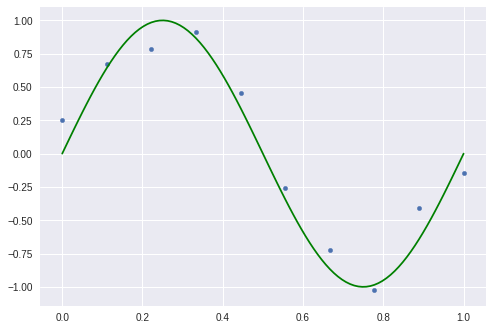

In [11]:
# generate data from a sine curve with added noise
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

x = np.linspace(0.0,1.0,num=100)
y = np.sin(2*np.pi*x)
xsample = np.linspace(0.0,1.0,num=10)
ysample = np.sin(2*np.pi*xsample) + np.random.randn(10)*0.2
plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,s=20,marker='o')

## Degree 1 linear regression model (in red)

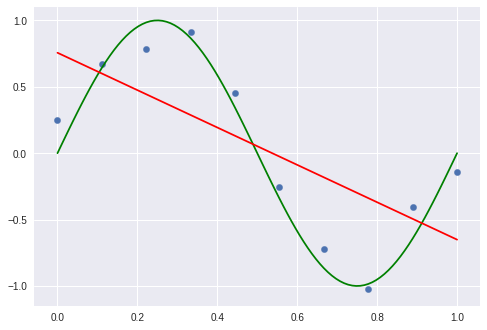

In [12]:
# fit a linear function on xsample, ysample
lr1 = linear_model.LinearRegression()
lr1.fit(xsample.reshape(-1,1),ysample)
ypred = lr1.predict(xsample.reshape(-1,1))
plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,marker='o',s=40)
plt.plot(xsample,ypred,'r')

## Degree 3 linear model (in red)

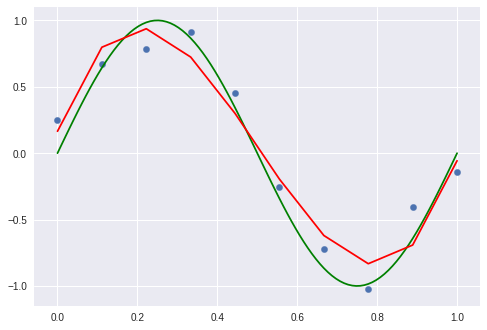

In [13]:
# fit a third degree polynomial
poly = PolynomialFeatures(3)
xpoly_sample = poly.fit_transform(xsample.reshape(-1,1))
lr3 = linear_model.LinearRegression()
lr3.fit(xpoly_sample,ysample)
ypred3 = lr3.predict(xpoly_sample)

plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,marker='o',s=40)
plt.plot(xsample,ypred3,'r')

## Degree 9 linear model (in red)

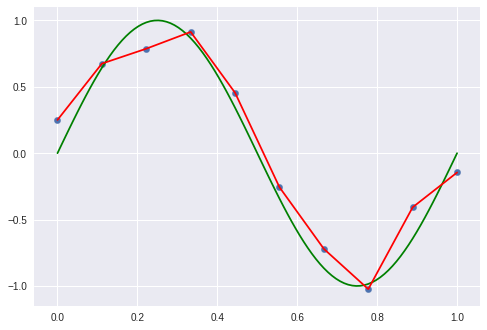

In [14]:
# fit a ninth degree polynomial
poly = PolynomialFeatures(9)
xpoly_sample = poly.fit_transform(xsample.reshape(-1,1))
lr9 = linear_model.LinearRegression()
lr9.fit(xpoly_sample,ysample)
ypred9 = lr9.predict(xpoly_sample)

plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,marker='o',s=40)
plt.plot(xsample,ypred9,'r')

## Degree 14 linear model (in red)

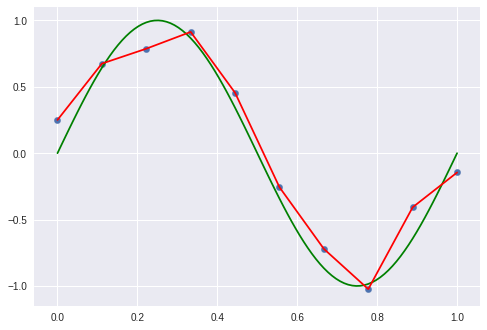

In [15]:
# fit a 14th degree polynomial
poly = PolynomialFeatures(14)
xpoly_sample = poly.fit_transform(xsample.reshape(-1,1))
lr14 = linear_model.LinearRegression()
lr14.fit(xpoly_sample,ysample)
ypred14 = lr14.predict(xpoly_sample)

plt.plot(x,y,color='g')
plt.scatter(xsample,ysample,marker='o',s=40)
plt.plot(xsample,ypred14,'r')

## Measuring train and test error as a function of model degree

Text(0,0.5,'Sum Squared Error')

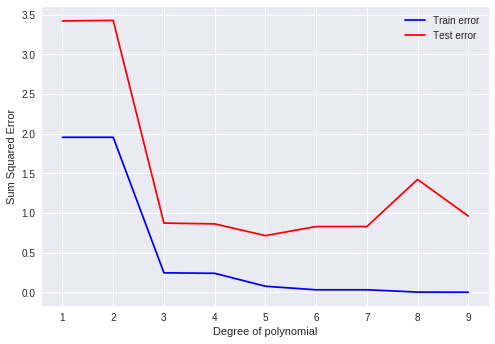

In [16]:
# train/test errors as a function of model complexity
train_error = np.zeros((10,))
test_error = np.zeros((10,))

# make an independent test set
xtest = np.linspace(0.0,1.0,num=30)[:10]
ytest = np.sin(2*np.pi*xtest) + np.random.randn(10)*0.2
 
for d in range(1,10):
    poly = PolynomialFeatures(d)
    xpoly_sample = poly.fit_transform(xsample.reshape(-1,1))
    lr = linear_model.LinearRegression()
    lr.fit(xpoly_sample,ysample)
    ypred_train = lr.predict(xpoly_sample)
    ypred_test = lr.predict(poly.fit_transform(xtest.reshape(-1,1)))
    tr_err = ysample-ypred_train
    train_error[d] = np.dot(tr_err.T,tr_err)
    te_err = ytest-ypred_test
    test_error[d] = np.dot(te_err.T,te_err)

    
plt.plot(range(1,10),train_error[1:10],'b',label='Train error')
plt.plot(range(1,10),test_error[1:10],'r',label='Test error')
plt.legend(loc='upper right')
plt.xlabel('Degree of polynomial') 
plt.ylabel('Sum Squared Error')

## A simple classification problem (2 class)
- generate data from two classes
- build 1-KNN and 15-KNN model
- generate independent test set from the same distribution
- select k by examining variation of test error against k

## Generate data

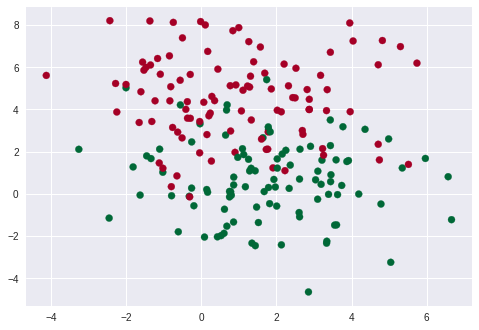

In [17]:
# generate data for classification test
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std = 2.0,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlGn)

## Build KNN model with 1 neighbor

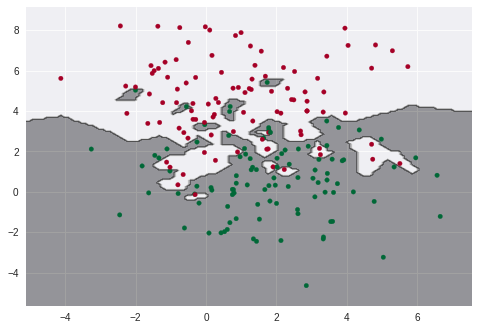

In [18]:
# build a 1-KNN model
from sklearn.neighbors import KNeighborsClassifier

# Plotting decision regions
def plot_knn_boundary(X,y,clf):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)  
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.RdYlGn)

clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X,y)
plot_knn_boundary(X,y,clf1)

## Build KNN model with 15 neighbors

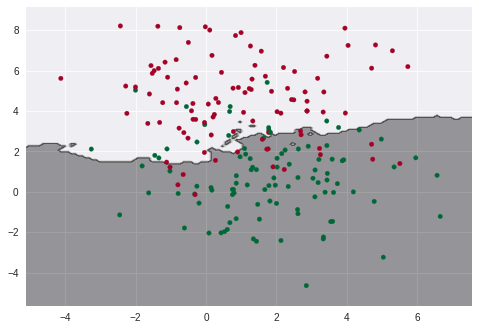

In [19]:
clf15 = KNeighborsClassifier(n_neighbors=15)
clf15.fit(X,y)
plot_knn_boundary(X,y,clf15)

## Variation in train and test accuracy with k

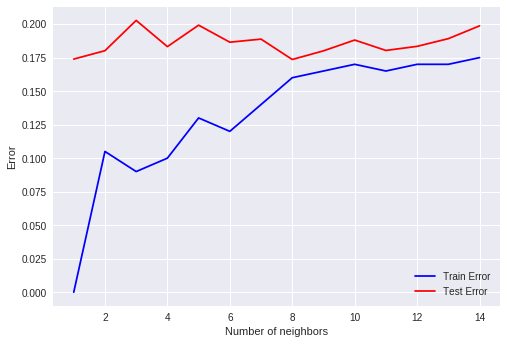

In [20]:
train_accuracy =np.zeros((15,))
test_accuracy = np.zeros((15,))

Xtest, ytest = make_blobs(n_samples=20000, centers=2, n_features=2, cluster_std = 2.0,random_state=3)

for k in range(1,15):
   
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    train_accuracy[k] = 1.0 - knn.score(X, y)
    test_accuracy[k] = 1.0 - knn.score(Xtest, ytest) 
    
plt.plot(range(1,15),train_accuracy[1:15],'b',label='Train Error')
plt.plot(range(1,15),test_accuracy[1:15],'r',label='Test Error')
plt.legend(loc='lower right')
plt.xlabel('Number of neighbors') 
plt.ylabel('Error')
plt.show()